In [1]:
# import required liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read dataset
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [5]:
# print maximum rows and columns from the dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
# check information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
# check the null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.isnull().sum().sum()

0

no null value in the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# encoding with object feature

In [11]:
df["Geography"].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df.drop(columns="Surname", inplace=True)


In [13]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
categerical_fea=df.select_dtypes(include=["object"])

In [15]:
categerical_fea

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
5,Spain,Male
6,France,Male
7,Germany,Female
8,France,Male
9,France,Male


In [16]:
from sklearn.preprocessing import LabelEncoder

cat = ["Geography", "Gender"]
le = LabelEncoder()

for name in cat:
    df[name] = le.fit_transform(df[name])

In [17]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  int32  
 4   Gender           10000 non-null  int32  
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(9)
memory usage: 937.6 KB


In [19]:
df.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
df.corr()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,-0.010358,0.018196,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.006516,-0.002641,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Geography,-0.010358,0.006516,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
Gender,0.018196,-0.002641,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
Age,0.000783,0.009497,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138


<Axes: xlabel='Exited', ylabel='count'>

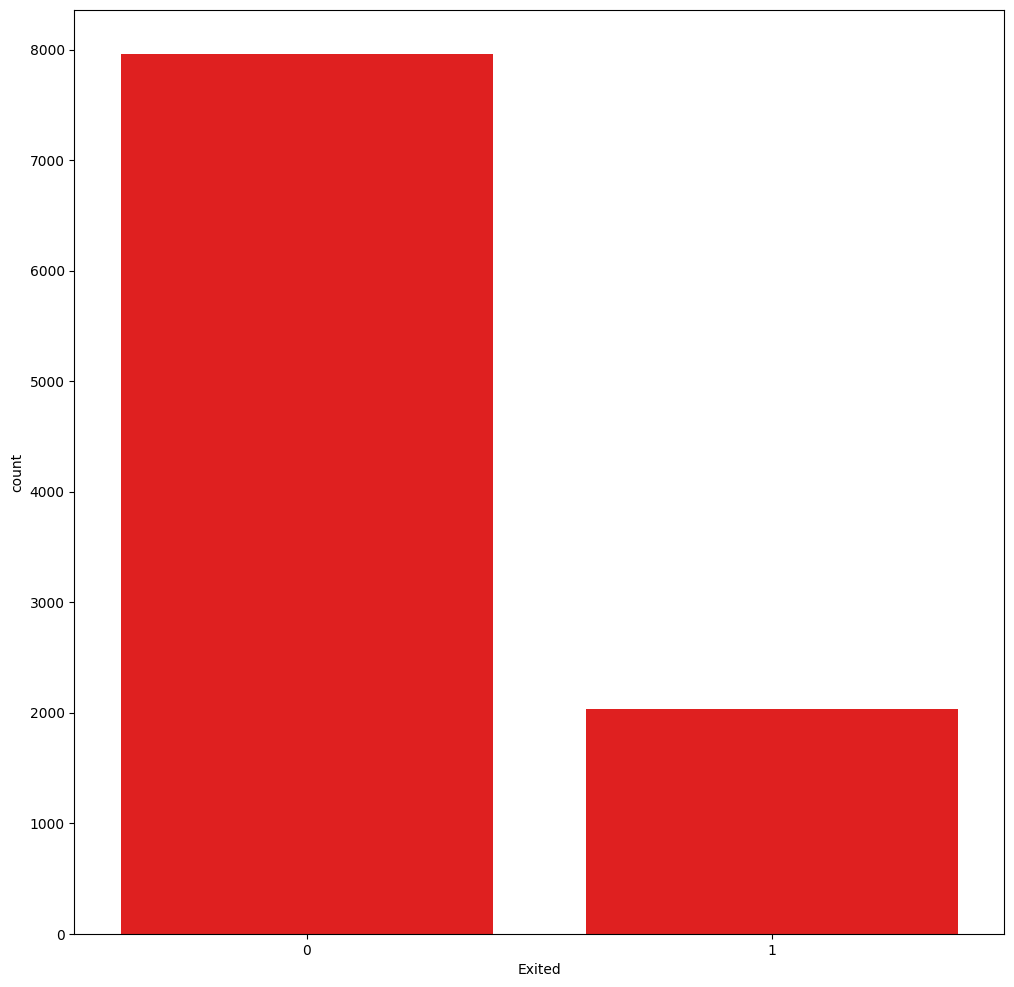

In [21]:
plt.figure(figsize=(12,12))
sns.countplot(x="Exited", data=df,color="r")


<Axes: >

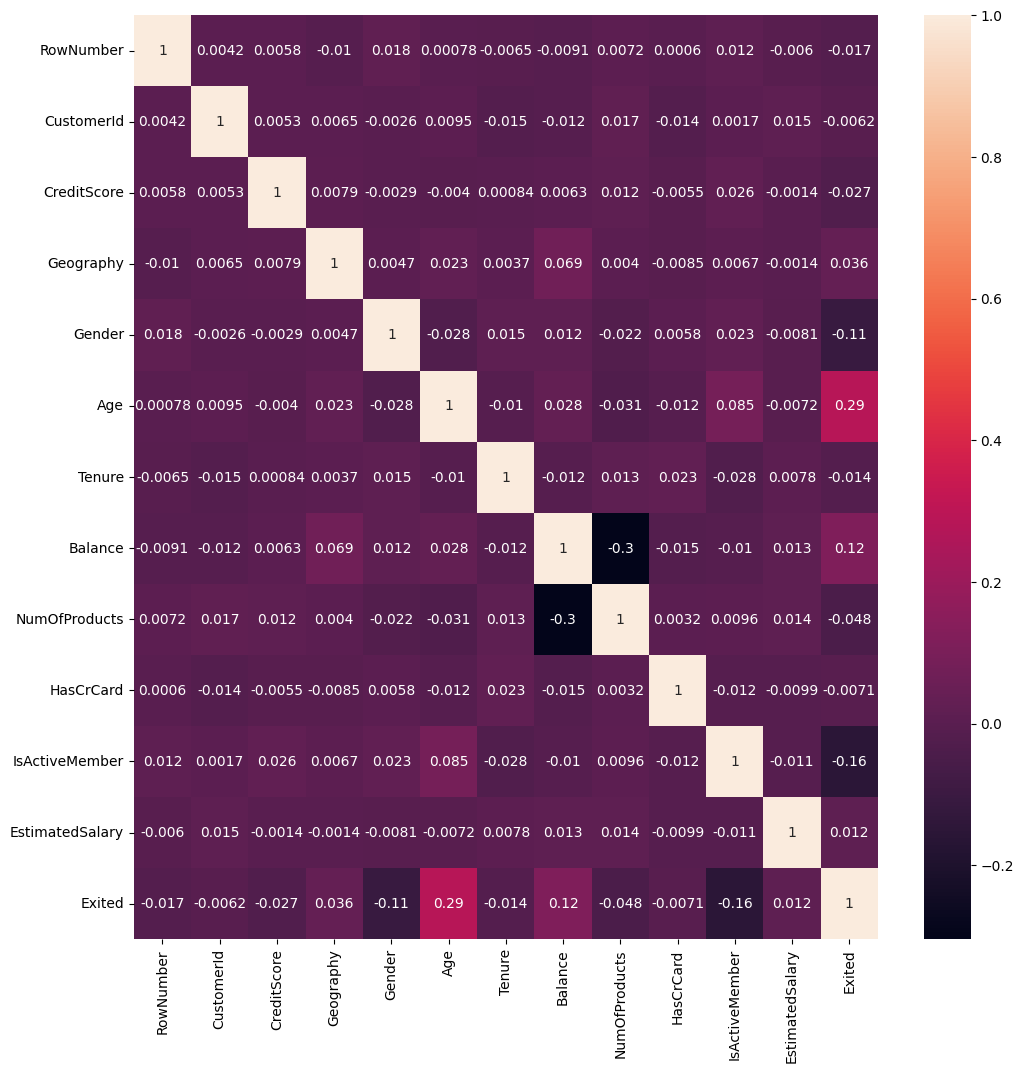

In [22]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

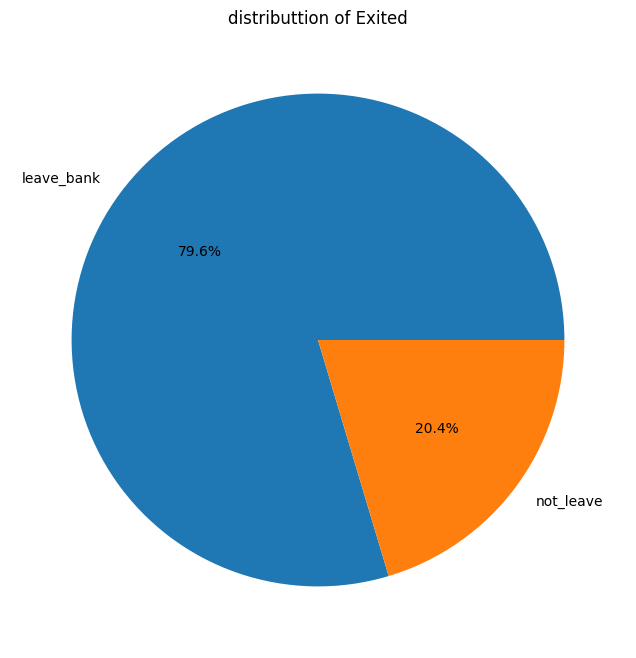

In [23]:
plt.figure(figsize=(8,8))
plt.pie(df["Exited"].value_counts(),autopct='%.1f%%',labels=["leave_bank","not_leave"])
plt.title("distributtion of Exited")
plt.show()

In [24]:
# worning ignore 
import warnings
warnings.filterwarnings("ignore")

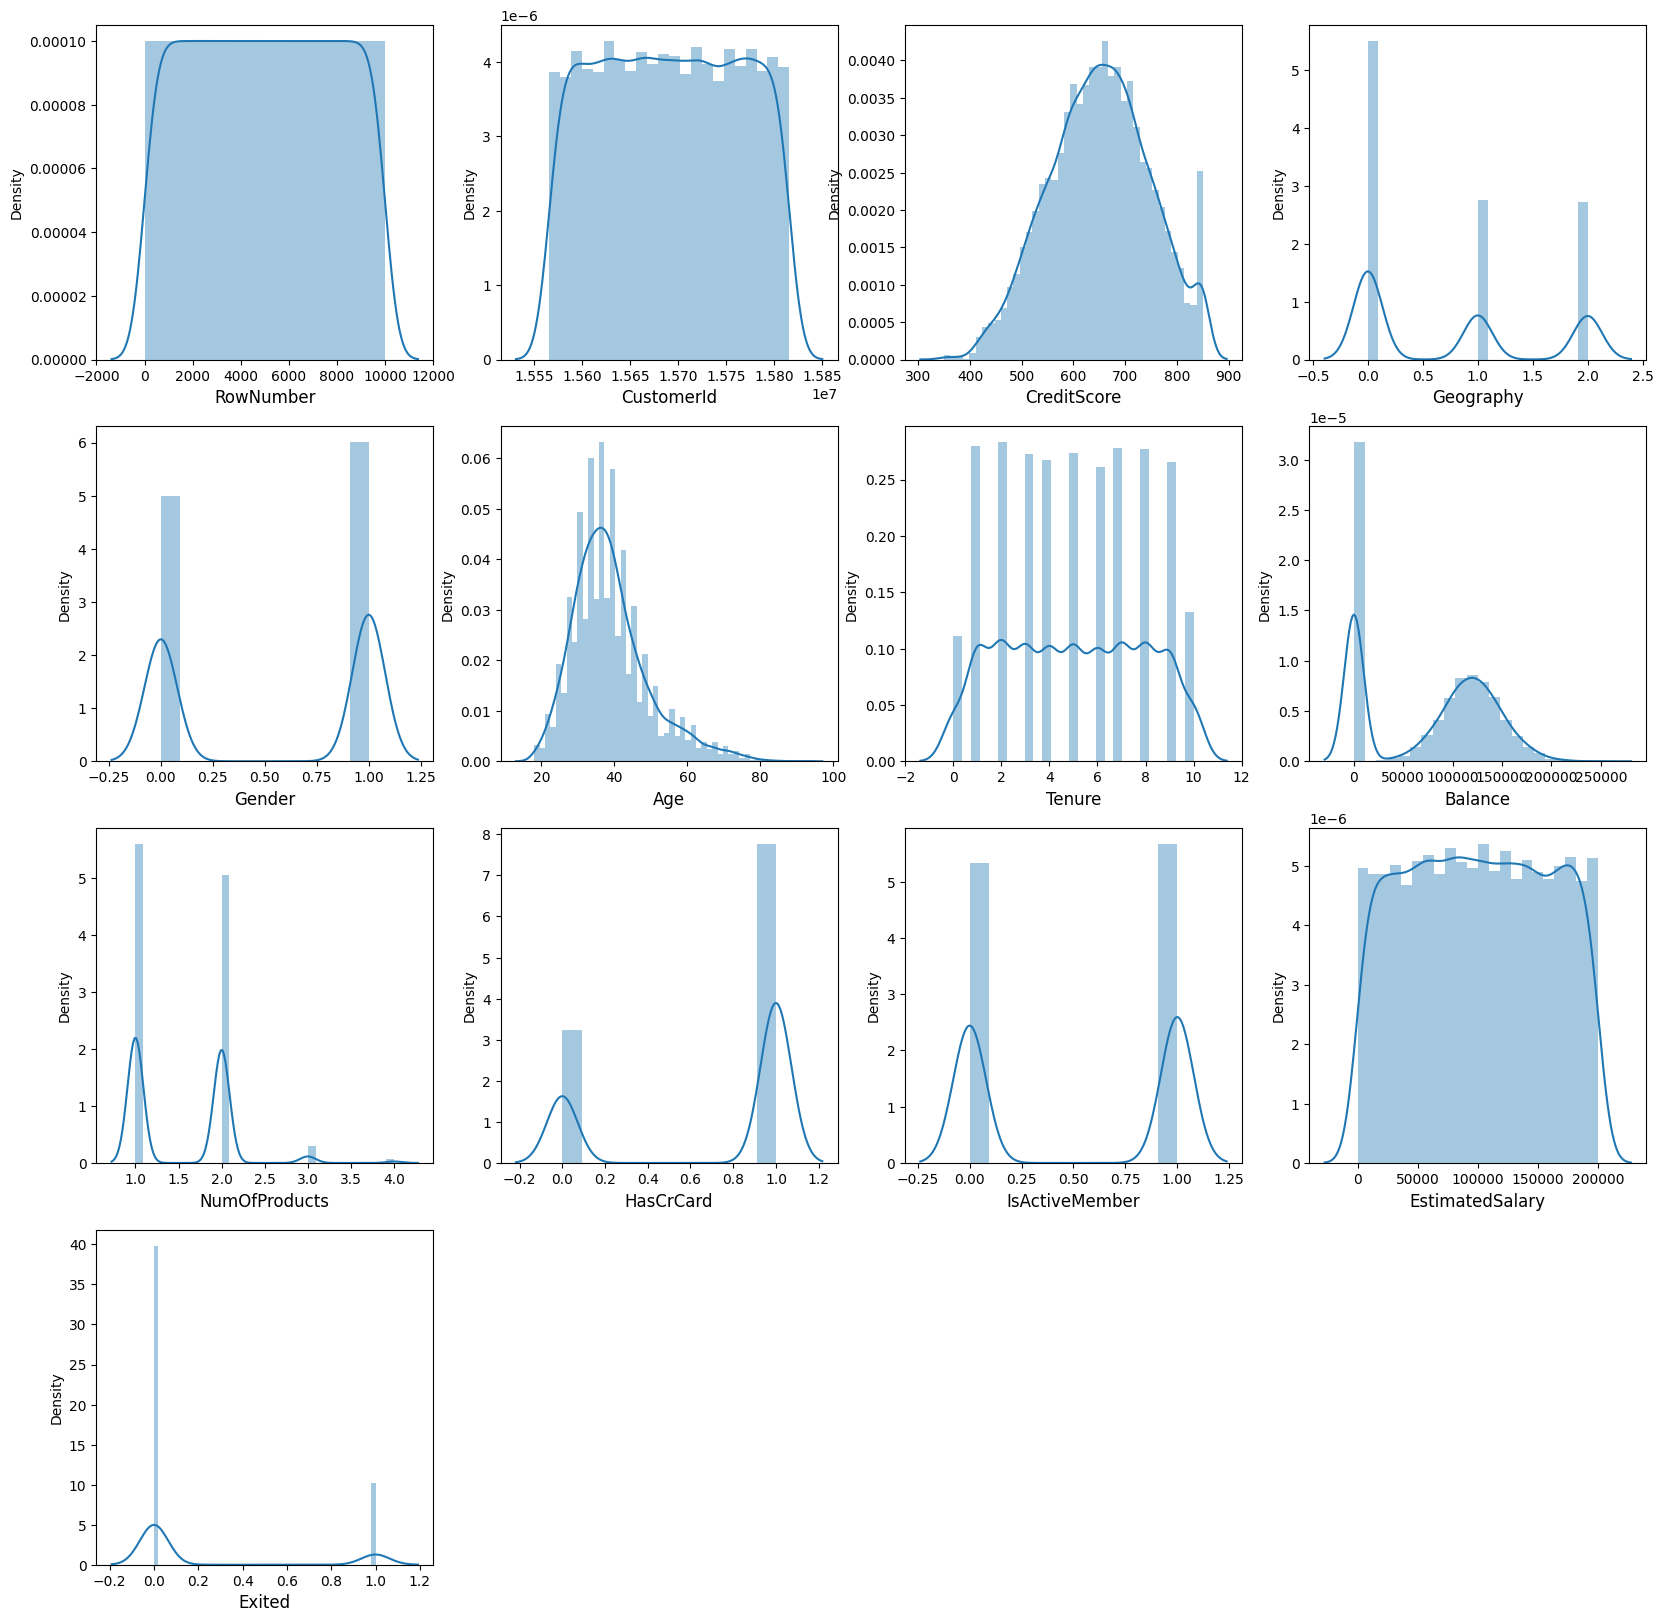

In [26]:
# show distplot
plt.figure(figsize=(20,20))
graph=1
for num in df[:15]:
    plt.subplot(4,4,graph)
    sns.distplot(df[num])
    plt.xlabel(num,fontsize=12)
    graph+=1
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 1133


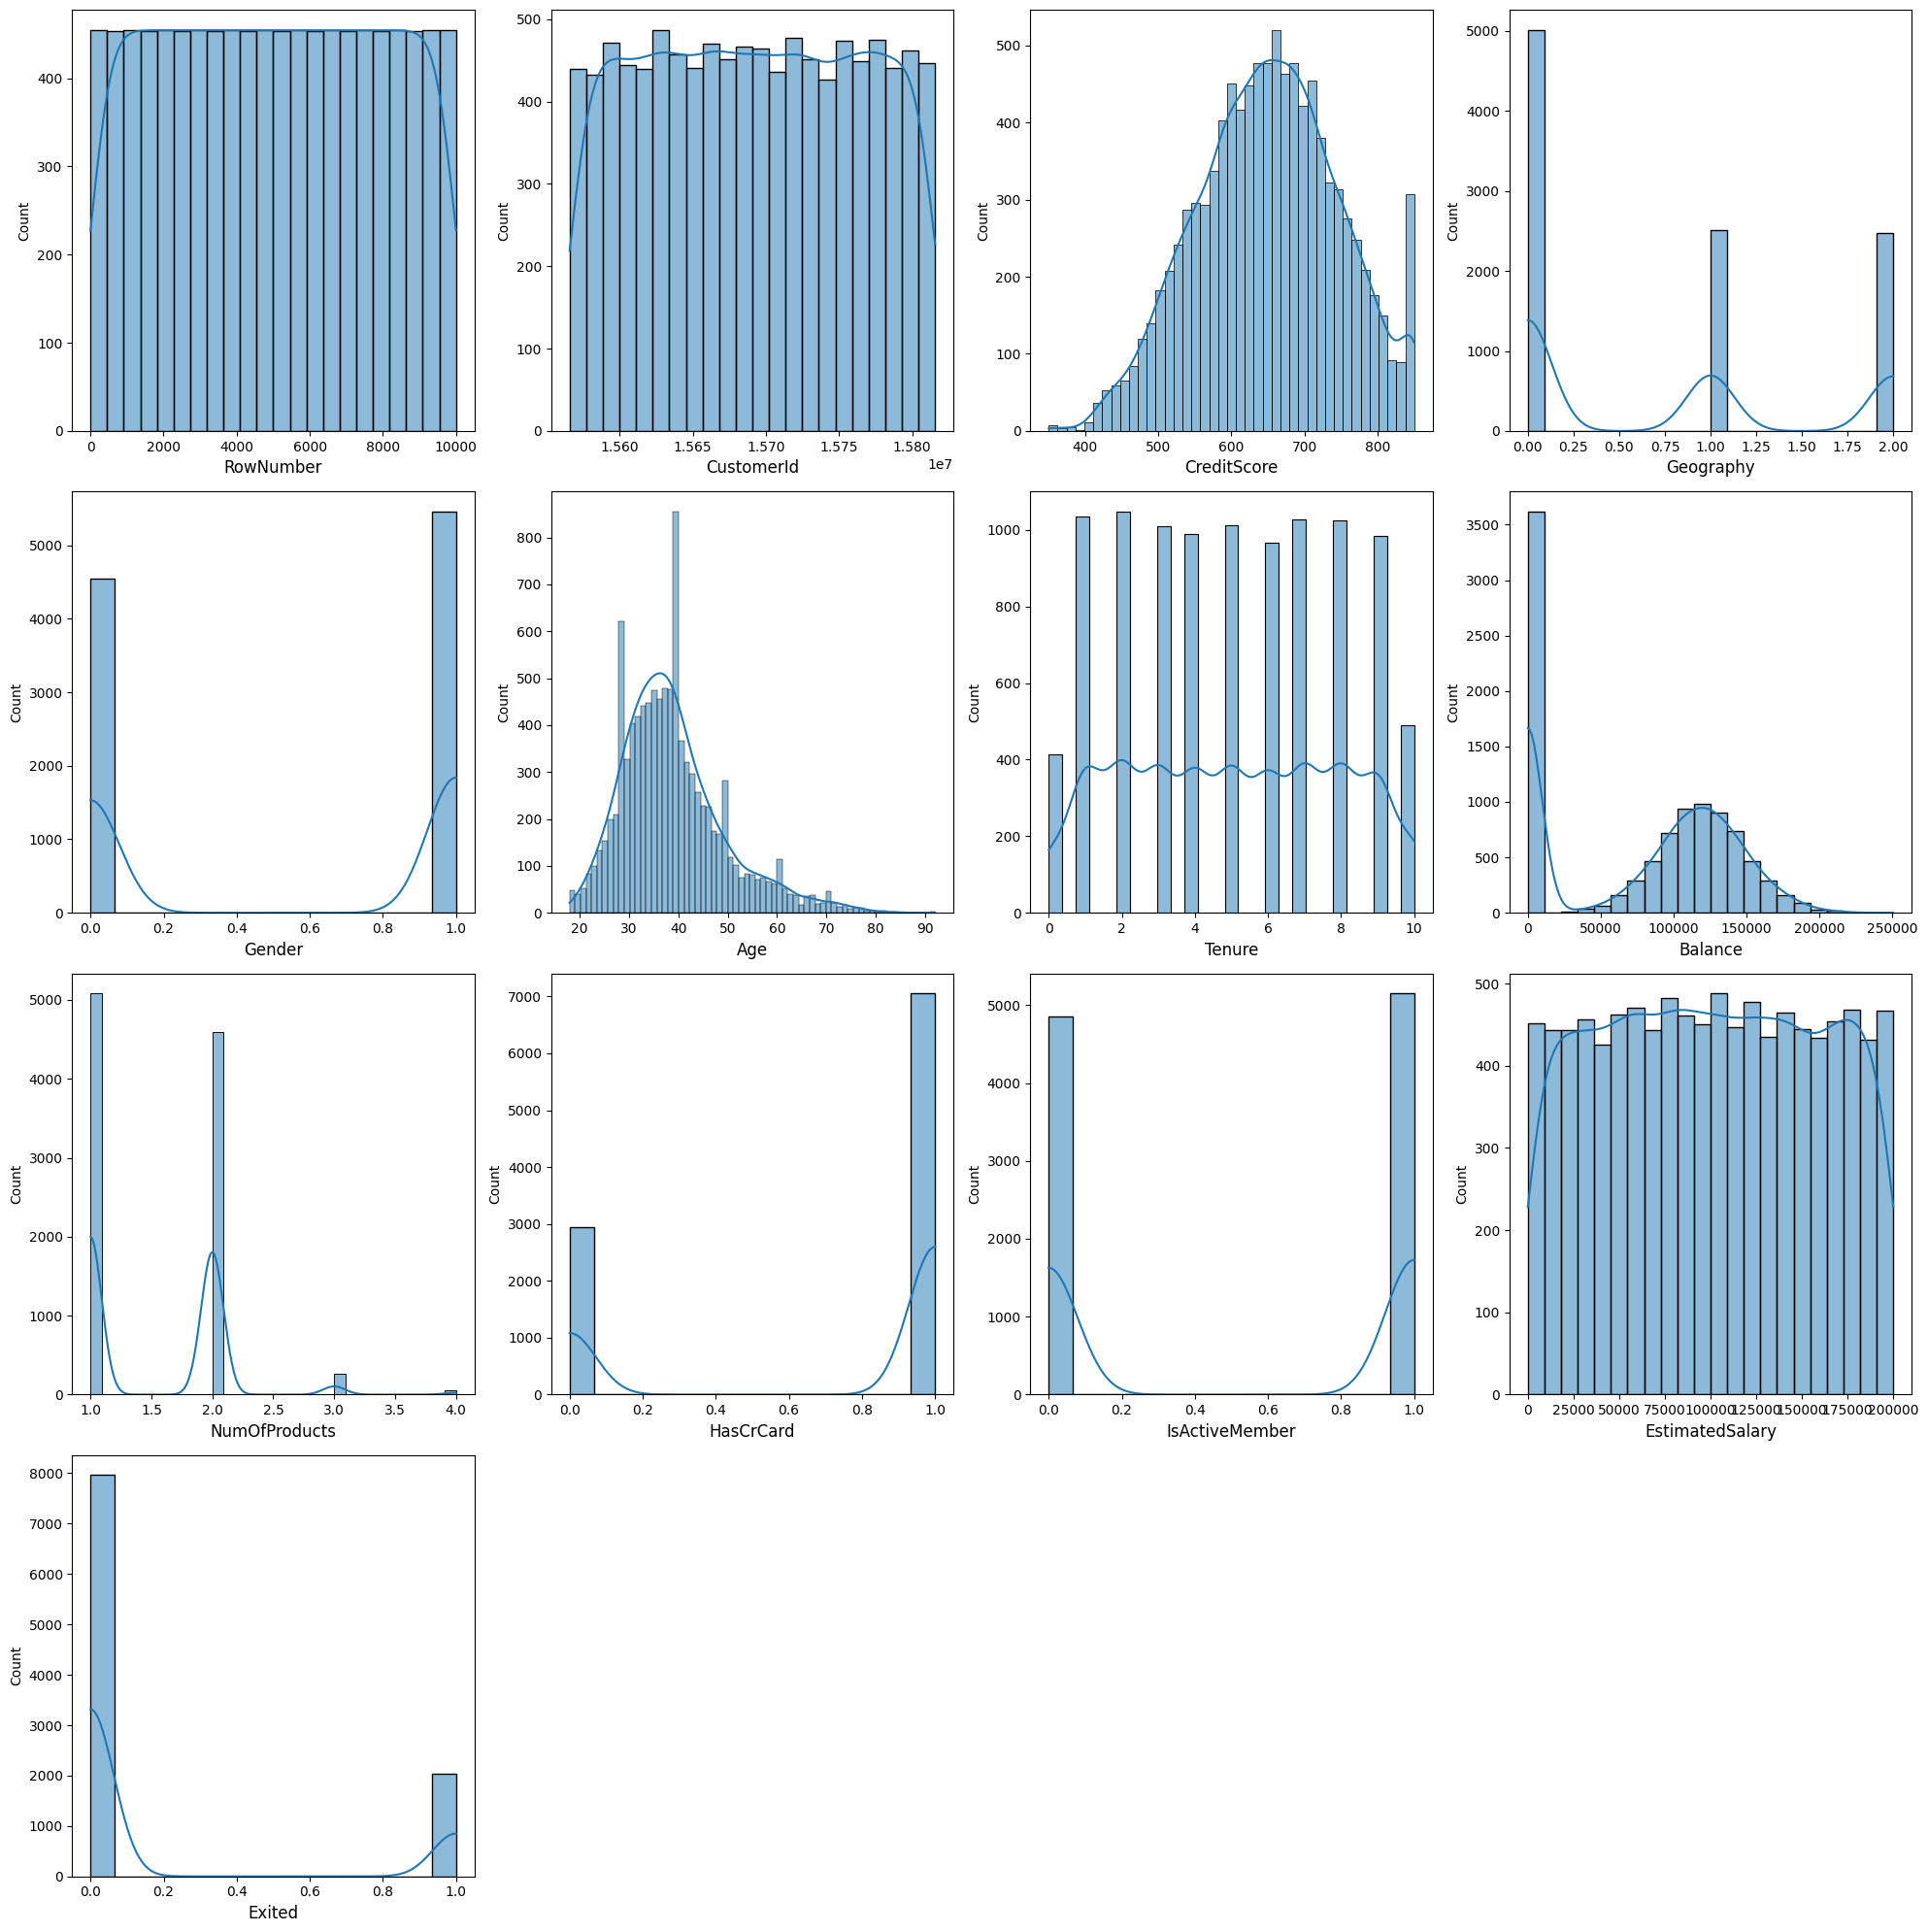

In [25]:
plt.figure(figsize=(20, 20))
graph = 1
for num in df.columns[:15]:
    plt.subplot(4, 4, graph)
    sns.histplot(df[num], kde=True)  # or use sns.boxplot(), sns.scatterplot(), etc.
    plt.xlabel(num, fontsize=12)
    graph += 1
plt.tight_layout()
plt.show()


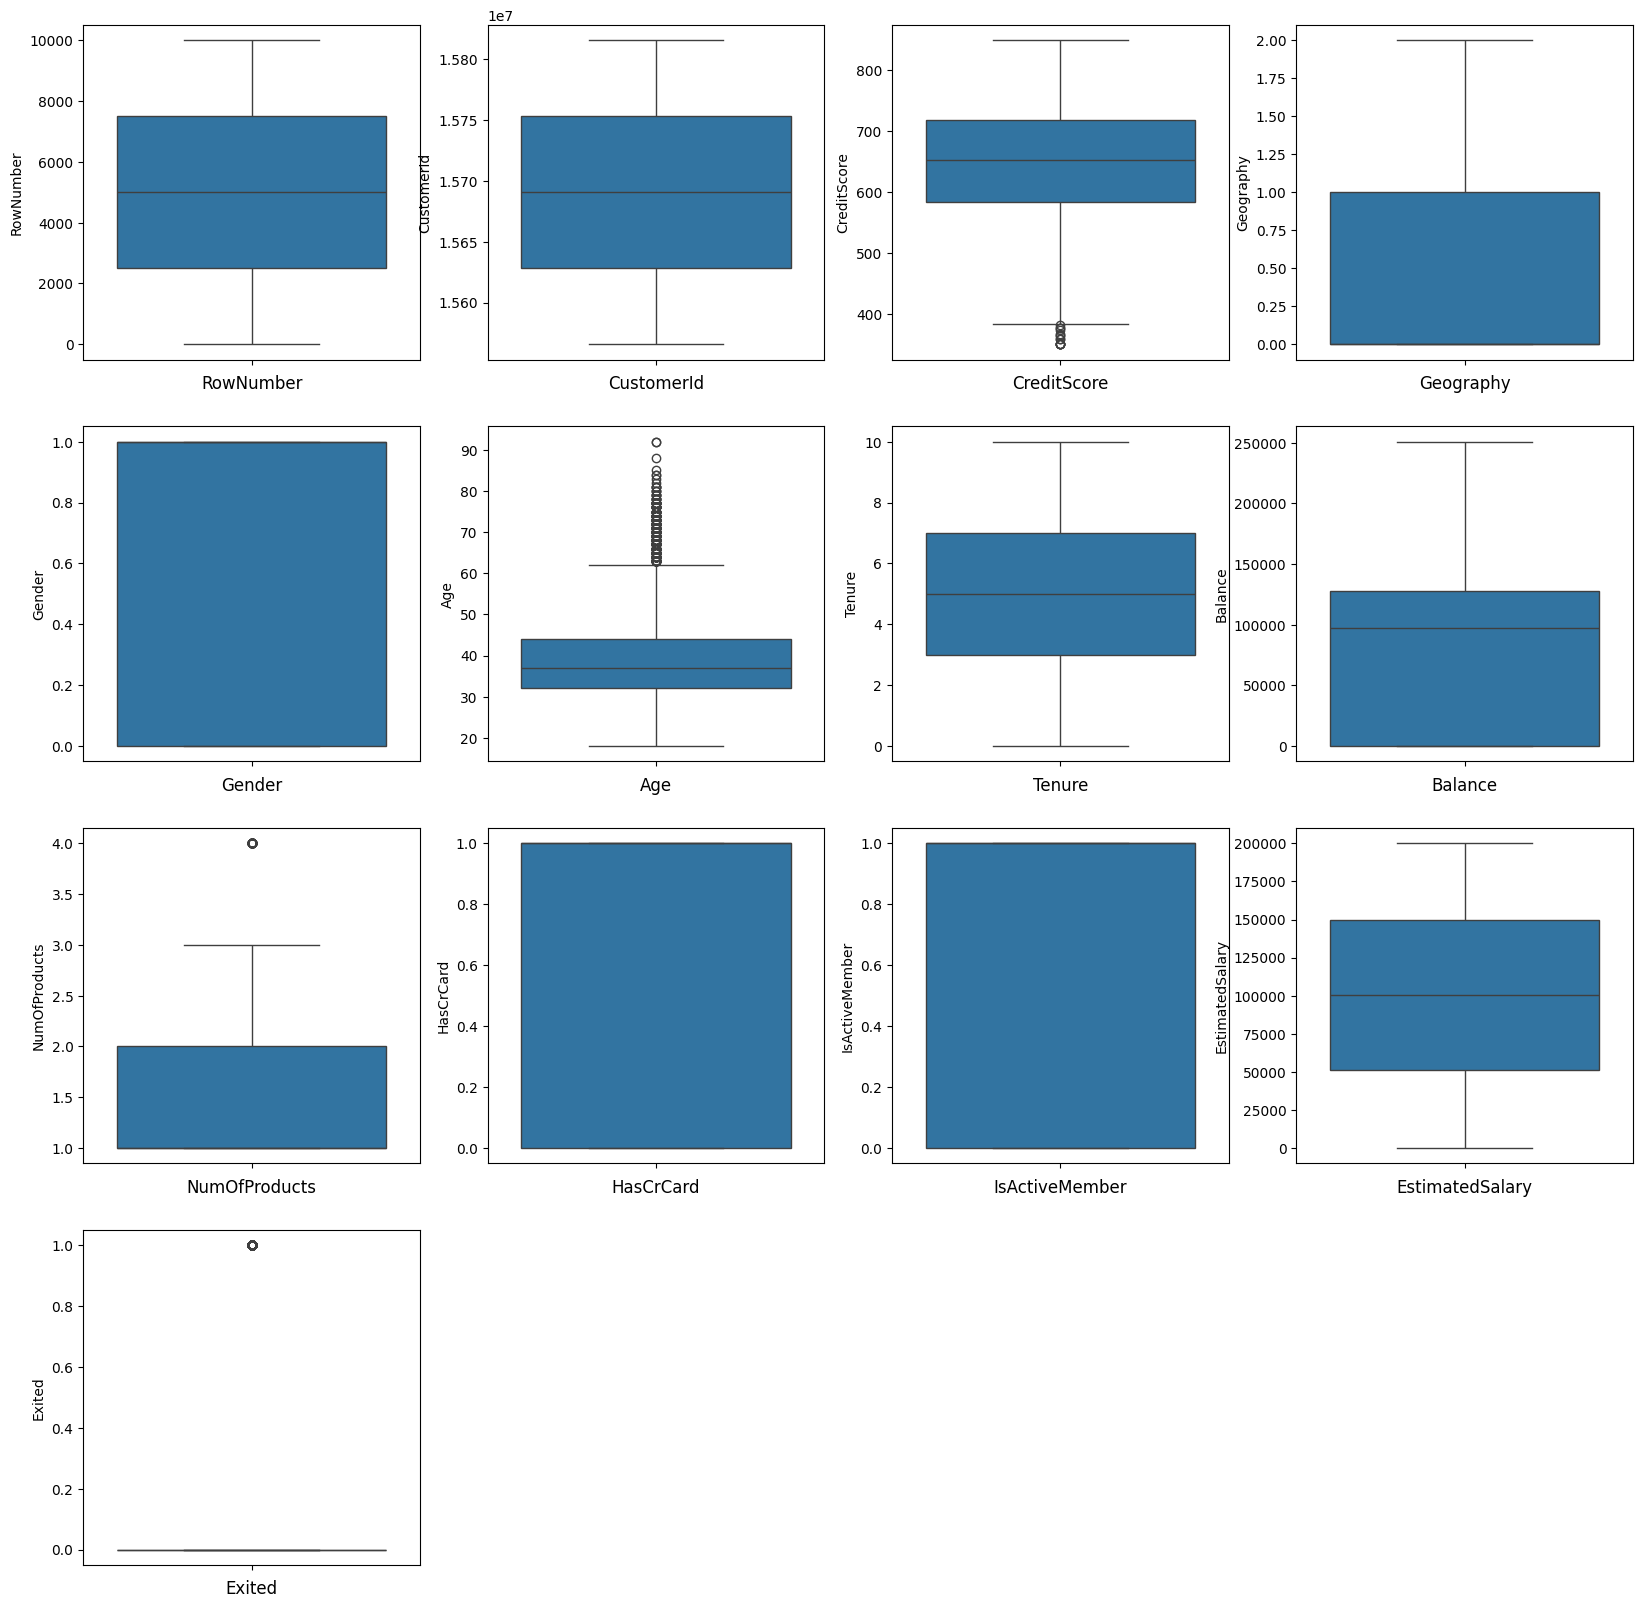

In [27]:
plt.figure(figsize=(20, 20))
graph = 1
for num in df.columns[:15]:
    plt.subplot(4, 4, graph)
    sns.boxplot(df[num])  # or use sns.boxplot(), sns.scatterplot(), etc.
    plt.xlabel(num, fontsize=12)
    graph += 1
plt.show()


In [28]:
# check skewness
skewness=df.skew()
skewness

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Geography          0.500916
Gender            -0.183596
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

# Data preprocessing

In [29]:
X = df.drop('Exited', axis=1)  # Features
y = df['Exited']  # Target

In [30]:
X.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,619,0,0,42,2,0.00,1,1,1,101348.88
1,2,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58
2,3,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57
3,4,15701354,699,0,0,39,1,0.00,2,0,0,93826.63
4,5,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10


In [31]:
x=X

In [32]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Standization and normalization

In [33]:
#  apply power transform
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method = 'yeo-johnson')
X=pd.DataFrame(pt.fit_transform(x),columns=x.columns) # REDUCE THE SKEWNESS and normalizze the data

In [34]:
X.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-2.187332,-0.782854,-0.335450,-0.968696,-1.095988,0.451286,-1.027104,-1.324054,-0.968357,0.646092,0.970243,0.118750
1,-2.184333,-0.605946,-0.448602,1.312507,-1.095988,0.359732,-1.447834,0.632125,-0.968357,-1.547768,0.970243,0.298155
2,-2.181618,-0.995876,-1.524793,-0.968696,-1.095988,0.451286,1.016561,0.870229,1.820493,0.646092,-1.030670,0.320049
3,-2.179096,0.145674,0.495043,-0.968696,-1.095988,0.168117,-1.447834,-1.324054,0.936715,-1.547768,-1.030670,-0.005022
4,-2.176718,0.653190,2.095417,1.312507,-1.095988,0.540200,-1.027104,0.778700,-0.968357,0.646092,0.970243,-0.256295


In [35]:
# apply standard scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

# split train and test data

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("shape of x_train",x_train.shape)
print("shape of x_test",x_test.shape)
print("shape of y_train",y_train.shape)
print("shape oof y_test",y_test.shape)

shape of x_train (8000, 12)
shape of x_test (2000, 12)
shape of y_train (8000,)
shape oof y_test (2000,)


# check inbalance dattaset

In [37]:
y_train.value_counts()

Exited
0    6356
1    1644
Name: count, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Define the SMOTE instance with a sampling strategy of 0.8
R_SMP = SMOTE(sampling_strategy=0.80)

# Apply SMOTE to the training data
x_train_ns, y_train_ns = R_SMP.fit_resample(x_train, y_train)

# Print the class distribution before and after SMOTE
print("Before resampling, class distribution:", Counter(y_train))
print("After resampling, class distribution:", Counter(y_train_ns))

Before resampling, class distribution: Counter({0: 6356, 1: 1644})
After resampling, class distribution: Counter({0: 6356, 1: 5084})


# trained the model

logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_pred=lr.predict(x_test)
print("accuracy score",accuracy_score(y_pred,y_test))
print("confusion matrix",confusion_matrix(y_pred,y_test))
print("classification report",classification_report(y_pred,y_test))

accuracy score 0.747
confusion matrix [[1245  144]
 [ 362  249]]
classification report               precision    recall  f1-score   support

           0       0.77      0.90      0.83      1389
           1       0.63      0.41      0.50       611

    accuracy                           0.75      2000
   macro avg       0.70      0.65      0.66      2000
weighted avg       0.73      0.75      0.73      2000



svm (support vector machine)

In [40]:
from sklearn.svm import SVC
sc=SVC()
sc.fit(x_train_ns,y_train_ns)
y_pred=sc.predict(x_test)
print("accuracy score",accuracy_score(y_pred,y_test))
print("confusion matrix",confusion_matrix(y_pred,y_test))
print("classification report",classification_report(y_pred,y_test))


accuracy score 0.8005
confusion matrix [[1342  134]
 [ 265  259]]
classification report               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1476
           1       0.66      0.49      0.56       524

    accuracy                           0.80      2000
   macro avg       0.75      0.70      0.72      2000
weighted avg       0.79      0.80      0.79      2000



RandomForest classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train_ns,y_train_ns)
y_pred=RF.predict(x_test)
print("accuracy score",accuracy_score(y_pred,y_test))
print("confusion matrix",confusion_matrix(y_pred,y_test))
print("classification report",classification_report(y_pred,y_test))


accuracy score 0.8485
confusion matrix [[1476  172]
 [ 131  221]]
classification report               precision    recall  f1-score   support

           0       0.92      0.90      0.91      1648
           1       0.56      0.63      0.59       352

    accuracy                           0.85      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.86      0.85      0.85      2000



GRADIENTBOOSTING ALGORITHOM

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train_ns,y_train_ns)
y_pred=gbc.predict(x_test)
print("accuracy score",accuracy_score(y_pred,y_test))
print("confusion matrix",confusion_matrix(y_pred,y_test))
print("classification report",classification_report(y_pred,y_test))

accuracy score 0.8475
confusion matrix [[1432  130]
 [ 175  263]]
classification report               precision    recall  f1-score   support

           0       0.89      0.92      0.90      1562
           1       0.67      0.60      0.63       438

    accuracy                           0.85      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.84      0.85      0.84      2000



XGBOOST CLASSIFIER

In [43]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train_ns,y_train_ns)
y_pred=xgb.predict(x_test)
print("accuracy score",accuracy_score(y_pred,y_test))
print("confusion matrix",confusion_matrix(y_pred,y_test))
print("classification report",classification_report(y_pred,y_test))


accuracy score 0.857
confusion matrix [[1496  175]
 [ 111  218]]
classification report               precision    recall  f1-score   support

           0       0.93      0.90      0.91      1671
           1       0.55      0.66      0.60       329

    accuracy                           0.86      2000
   macro avg       0.74      0.78      0.76      2000
weighted avg       0.87      0.86      0.86      2000



DECISIONTREE CLASSIFIER

In [44]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train_ns,y_train_ns)
y_pred=DT.predict(x_test)
print("accuracy score",accuracy_score(y_pred,y_test))
print("confusion matrix",confusion_matrix(y_pred,y_test))
print("classification report",classification_report(y_pred,y_test))


accuracy score 0.767
confusion matrix [[1322  181]
 [ 285  212]]
classification report               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1503
           1       0.54      0.43      0.48       497

    accuracy                           0.77      2000
   macro avg       0.68      0.65      0.66      2000
weighted avg       0.75      0.77      0.76      2000



# check crossvalidation

In [45]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x_train_ns,y_train_ns,cv=5)
# mean value
print("score of after crossvalidation",scr.mean())

score of after crossvalidation 0.7186188811188812


In [46]:
#  crossvalidattion of grediantboosting grediantboosting
from sklearn.model_selection import cross_val_score

scr=cross_val_score(gbc,x_train_ns,y_train_ns,cv=5)

print("score of after crossvalidation",scr.mean())

score of after crossvalidation 0.8506993006993007


In [47]:
#  crossvalidattion of RANDOMFOREST algorithom
from sklearn.model_selection import cross_val_score

scr=cross_val_score(RF,x_train_ns,y_train_ns,cv=3)

print("score of after crossvalidation",scr.mean())

score of after crossvalidation 0.8891663919599427


# apply parametertuning at randomforest model

In [48]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None]
}



grid = RandomizedSearchCV(estimator=RF, param_distributions=param_grid, cv=5, scoring='accuracy')
grid.fit(x_train_ns, y_train_ns)

# Best model
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

print("Best Accuracy:", accuracy_score(y_pred, y_test))
print("Confusion Matrix:\n", confusion_matrix(y_pred, y_test))
print("Classification Report:\n", classification_report(y_pred, y_test))


Best Accuracy: 0.8455
Confusion Matrix:
 [[1460  162]
 [ 147  231]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90      1622
           1       0.59      0.61      0.60       378

    accuracy                           0.85      2000
   macro avg       0.75      0.76      0.75      2000
weighted avg       0.85      0.85      0.85      2000



# RANDOMFOREST IS THE BEST MODEL WITH HYPERPARAMETER TUNING AND CRASSVALIDATION

# save model

In [49]:
 # using pickle and save the model
import pickle

# save the machine learning model
pickle.dump(best_model,open("MODEL_2.pickle","wb"))

# opend the machine learning model
MODEL=pickle.load(open("MODEL_2.pickle","rb"))


# predict the  value
y_pred_save_model=MODEL.predict(x_test)



In [50]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

## 